# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [0]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Load the dataset from your Drive folder

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

In [3]:
print(train.keys())
print(test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [5]:
print(train['X'].shape)
print(train['y'].shape)
print(test['X'].shape)
print(test['y'].shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [8]:
X_train , y_train = train['X'] , train['y']
X_test , y_test = test['X'] , test['y']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Data and Reading Train and Test Data

In [10]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


Transposing the the train and test data
by converting it from  
(width, height, channels, size) -> (size, width, height, channels)

In [11]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


Plotting Function for fig in n rows X m columns 
can be used for grayscale and RGB both

In [12]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

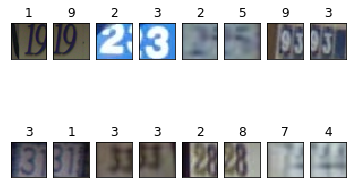

In [13]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)

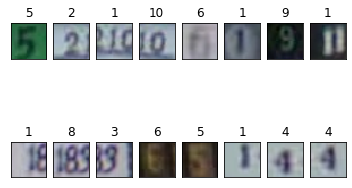

In [14]:
# Plot some test set images
plot_images(X_test, y_test, 2, 8)

To Check unique labels

In [15]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


Plotting distribution of data

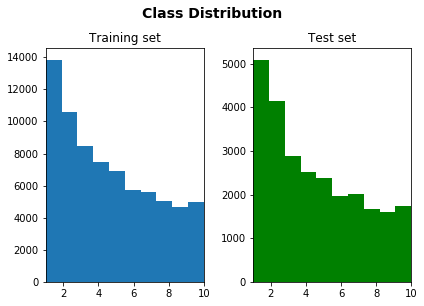

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

All distributions have a positive skew, meaning that we have an underweight of higher values.

Converting Label 10 -> 0

In [17]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [18]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Splitting the Training to Train+Validation
Splitting to 13% in Val Set as it gives around 9500 data
having min. of 800 instances of each class

Using random state to regenrate the whole Dataset in re-run

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

Visualize New Distribution

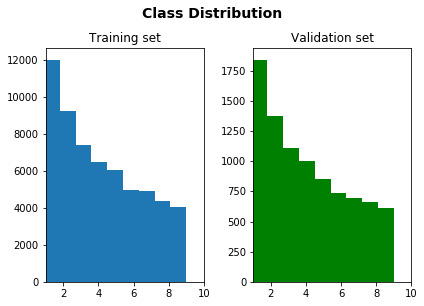

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation set")

fig.tight_layout()


Data in each set

In [21]:
y_train.shape, y_val.shape, y_test.shape

((63733,), (9524,), (26032,))

##Grayscale Conversion

To speed up our experiments we will convert our images from RGB to Grayscale, which grately reduces the amount of data we will have to process.

Y = 0.2990R + 0.5870G + 0.1140B

Here is a simple function that helps us print the size of a numpy array in a human readable format.

In [22]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

Converting to fload for numpy computation

In [23]:
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

In [24]:
print("Training Set", train_greyscale.shape)
print("Validation Set", val_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

Training Set (63733, 32, 32, 1)
Validation Set (9524, 32, 32, 1)
Test Set (26032, 32, 32, 1)



Removing RGB train, test, val set 
to reduce RAM Storage occupied by them

In [25]:
del X_train, X_test, X_val

Plotting greyscale image before Normalization

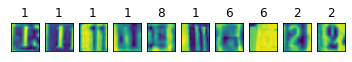

In [26]:
plot_images(train_greyscale, y_train, 1, 10)

Doing Normalization

In [27]:
# Calculate the mean on the training data
train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (train_greyscale - train_mean) / train_std
test_greyscale_norm = (test_greyscale - train_mean)  / train_std
val_greyscale_norm = (val_greyscale - train_mean) / train_std

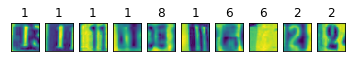

In [28]:
plot_images(train_greyscale_norm, y_train, 1, 10)

Plotting After Normalization

One Hot Label Encoding

Apply One Hot Encoding to make label
suitable for CNN Classification

In [29]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

Training set (63733, 10)
Validation set (9524, 10)
Test set (26032, 10)


Storing Data to Disk

Stored only the Grayscale Data 
not the RGB

In [30]:
import h5py

# Create file
h5f = h5py.File('SVHN_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_greyscale_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_greyscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=val_greyscale_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [32]:
import os
import time
# from __future__ import absolute_import
# from __future__ import print_function
from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

In [33]:
h5f = h5py.File('SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


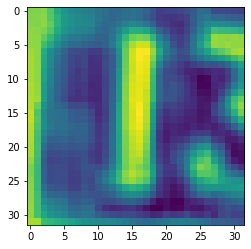

label: 1


In [48]:
# Display one of the images
i = 0
labels = np.argmax(y_train[i])
img = X_train[i,:,:,0]
plt.imshow(img)
plt.show()
print(f"label: {labels}")


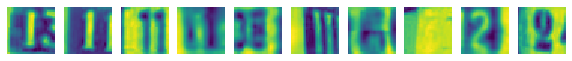

In [94]:
X_train[0].shape
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i,:,:,0])

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [70]:
def get_model(input_shape):
    
    model = Sequential([
        Flatten(input_shape = input_shape),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])
    
    return model

In [71]:
model = get_model(X_train[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [72]:
def compile_model(model):
    
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

In [73]:
compile_model(model)
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


In [78]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
             
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finishing epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training:")

In [75]:
def get_checkpoint_best_only():
   
    checkpoint_best_path = 'checkpoints_best_only/checkpoint'
    checkpoint_best_only = ModelCheckpoint(filepath=checkpoint_best_path, save_freq='epoch',
                            save_weights_only=True, monitor = 'val_accuracy',
                            save_best_only=True,verbose = 1)
    
    return checkpoint_best_only

In [79]:
TrainingCallback = TrainingCallback()
checkpoint_best_only = get_checkpoint_best_only()

In [61]:
def train_model(model, train_data, train_targets, epochs):
   
    history = model.fit(train_data, train_targets, epochs=epochs, 
                        batch_size=64, validation_data=(X_val,y_val),verbose=False)
    
    return history
    

In [80]:
callbacks = [TrainingCallback, checkpoint_best_only]
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val,y_val),callbacks=callbacks)

Train on 63733 samples, validate on 9524 samples
Starting training....
Starting epoch 0
Epoch 1/30
63424/63733 [============================>.] - ETA: 0s - loss: 1.5875 - accuracy: 0.4676Finishing epoch 0

Epoch 00001: val_accuracy improved from -inf to 0.66474, saving model to checkpoints_best_only/checkpoint
63733/63733 [==============================] - 4s 64us/sample - loss: 1.5848 - accuracy: 0.4685 - val_loss: 1.0841 - val_accuracy: 0.6647
Starting epoch 1
Epoch 2/30
62592/63733 [============================>.] - ETA: 0s - loss: 0.9836 - accuracy: 0.6973Finishing epoch 1

Epoch 00002: val_accuracy improved from 0.66474 to 0.72365, saving model to checkpoints_best_only/checkpoint
63733/63733 [==============================] - 3s 49us/sample - loss: 0.9821 - accuracy: 0.6977 - val_loss: 0.9013 - val_accuracy: 0.7236
Starting epoch 2
Epoch 3/30
63424/63733 [============================>.] - ETA: 0s - loss: 0.8295 - accuracy: 0.7470Finishing epoch 2

Epoch 00003: val_accuracy improve

62848/63733 [============================>.] - ETA: 0s - loss: 0.3630 - accuracy: 0.8895Finishing epoch 22

Epoch 00023: val_accuracy improved from 0.83442 to 0.83557, saving model to checkpoints_best_only/checkpoint
63733/63733 [==============================] - 4s 63us/sample - loss: 0.3630 - accuracy: 0.8895 - val_loss: 0.5989 - val_accuracy: 0.8356
Starting epoch 23
Epoch 24/30
63552/63733 [============================>.] - ETA: 0s - loss: 0.3547 - accuracy: 0.8916Finishing epoch 23

Epoch 00024: val_accuracy did not improve from 0.83557
63733/63733 [==============================] - 5s 75us/sample - loss: 0.3546 - accuracy: 0.8915 - val_loss: 0.6118 - val_accuracy: 0.8327
Starting epoch 24
Epoch 25/30
63616/63733 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8939Finishing epoch 24

Epoch 00025: val_accuracy did not improve from 0.83557
63733/63733 [==============================] - 4s 67us/sample - loss: 0.3456 - accuracy: 0.8940 - val_loss: 0.5979 - val_

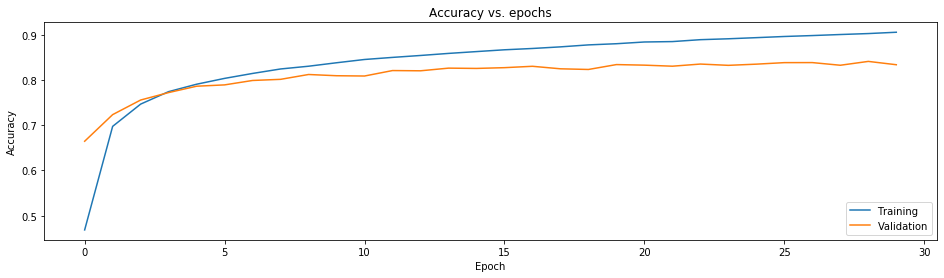

In [81]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

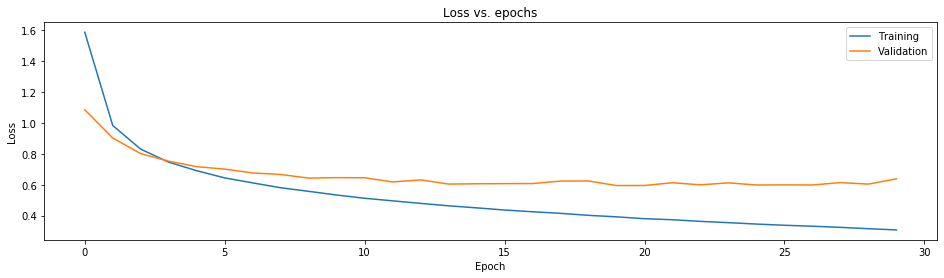

In [82]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [83]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head(30)

,loss,accuracy,val_loss,val_accuracy
0,1.584821,0.468470,1.084053,0.664742
1,0.982071,0.697661,0.901305,0.723646
2,0.829350,0.746929,0.800459,0.755985
3,0.745353,0.774544,0.751722,0.772470
4,0.690194,0.790940,0.716486,0.786539
5,0.643849,0.803869,0.700396,0.789479
6,0.611523,0.814806,0.675886,0.799244
7,0.580019,0.824706,0.665971,0.801764
8,0.556969,0.830794,0.642341,0.812474
9,0.533191,0.838451,0.645482,0.809744


In [84]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

26032/1 - 1s - loss: 0.8259 - accuracy: 0.8052


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [85]:
h5f = h5py.File('SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


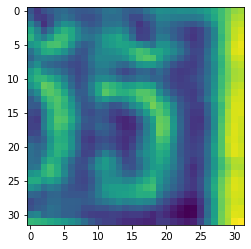

label: 5


In [89]:
# Display one of the images
i = 30
labels = np.argmax(y_train[i])
img = X_train[i,:,:,0]
plt.imshow(img)
plt.show()
print(f"label: {labels}")


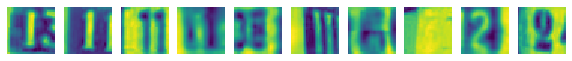

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i,:,:,0])

In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import numpy as np
import pandas as pd


In [114]:
def get_new_model(input_shape):
    
    model = Sequential([
        Conv2D(16,(3,3),padding="SAME",activation='relu',name='conv_1', input_shape=(input_shape)),
        Dropout(0.5),
        Conv2D(8,(3,3),padding="SAME",activation='relu',name='conv_2'),
        BatchNormalization(),
        Dropout(0.5),
        MaxPooling2D((4,4),name='pool_1'),
        Dense(128,activation='relu',name='dense_1'),
        Flatten(name='flatten2'),
        Dense(10,activation='softmax',name='dense_2')
    ])
    
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return model

In [115]:
model = get_new_model(X_train[0].shape)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 8)         1160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 8, 8, 8)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 8, 8, 128)        

In [103]:
compile_model(model)
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


In [129]:
def get_early_stopping():
    
    early_stopping = EarlyStopping(monitor='val_accuracy', patience = 7)
   
    return early_stopping
    

In [130]:
def get_checkpoint_best_CNN():
   
    checkpoint_best_path = 'checkpoints_best_only_CNN/checkpoint'
    checkpoint_best_only_CNN = ModelCheckpoint(filepath=checkpoint_best_path, save_freq='epoch',
                            save_weights_only=True, monitor = 'val_accuracy',
                            save_best_only=True,verbose = 1)
    
    return checkpoint_best_only_CNN

In [131]:
early_stopping = get_early_stopping()
checkpoint_best_only_CNN = get_checkpoint_best_CNN()


In [132]:
callbacks = [checkpoint_best_only_CNN, early_stopping]

In [133]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val,y_val),callbacks=callbacks)

Train on 63733 samples, validate on 9524 samples
Epoch 1/30
63680/63733 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.8601
Epoch 00001: val_accuracy improved from -inf to 0.82654, saving model to checkpoints_best_only_CNN/checkpoint
63733/63733 [==============================] - 112s 2ms/sample - loss: 0.4571 - accuracy: 0.8601 - val_loss: 0.5825 - val_accuracy: 0.8265
Epoch 2/30
63680/63733 [============================>.] - ETA: 0s - loss: 0.4432 - accuracy: 0.8637
Epoch 00002: val_accuracy did not improve from 0.82654
63733/63733 [==============================] - 115s 2ms/sample - loss: 0.4430 - accuracy: 0.8638 - val_loss: 0.5933 - val_accuracy: 0.8215
Epoch 3/30
63680/63733 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8675
Epoch 00003: val_accuracy did not improve from 0.82654
63733/63733 [==============================] - 119s 2ms/sample - loss: 0.4362 - accuracy: 0.8674 - val_loss: 0.6325 - val_accuracy: 0.8114
Epoch 4/30
636

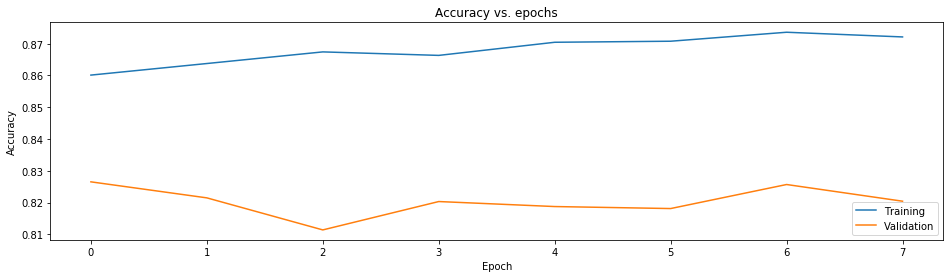

In [135]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

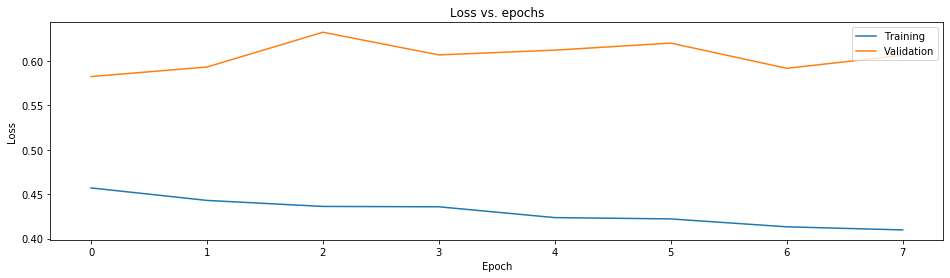

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [137]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head(30)

,loss,accuracy,val_loss,val_accuracy
0,0.457096,0.860120,0.582509,0.826543
1,0.443021,0.863760,0.593306,0.821504
2,0.436249,0.867416,0.632455,0.811424
3,0.435834,0.866317,0.606940,0.820349
4,0.423660,0.870444,0.612287,0.818774
5,0.422204,0.870773,0.620236,0.818144
6,0.413274,0.873598,0.591834,0.825704
7,0.409795,0.872123,0.606415,0.820454


In [138]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

26032/1 - 7s - loss: 0.4517 - accuracy: 0.7990


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [144]:
import os
print(os.getcwd())

E:\Learning Python\TensorFlow Coursera\02_SVHN_Project


In [153]:
checkpoint_best_path = 'checkpoints_best_only/checkpoint'
model_MLP = get_model(X_train[0].shape)
model_MLP.load_weights(checkpoint_best_path)

In [154]:
checkpoints_best_path = 'checkpoints_best_only_CNN/checkpoint'
model_CNN = get_new_model(X_train[0].shape)
model_CNN.load_weights(checkpoints_best_path)

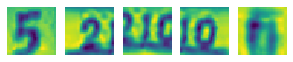

In [163]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(5, 1))
for i in range(5):
    ax[i].set_axis_off()
    ax[i].imshow(X_test[i,:,:,0])
    

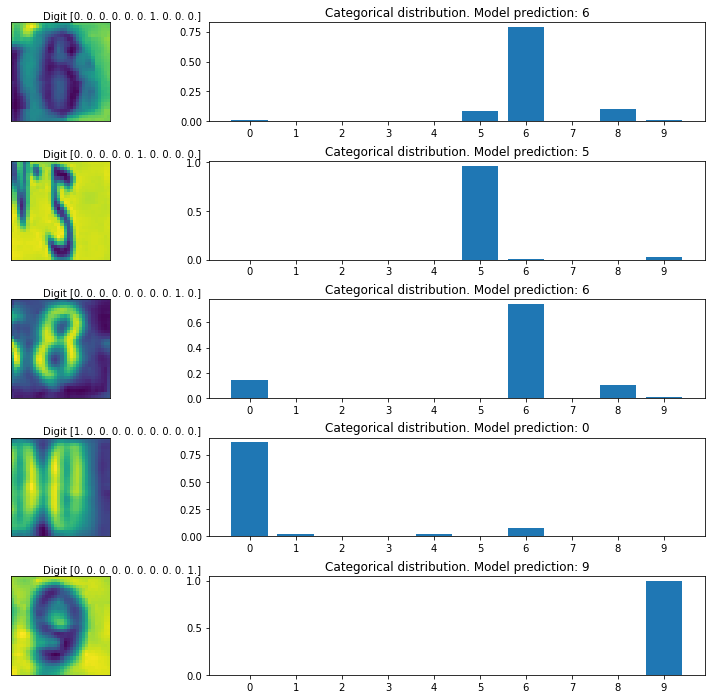

In [160]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_MLP.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

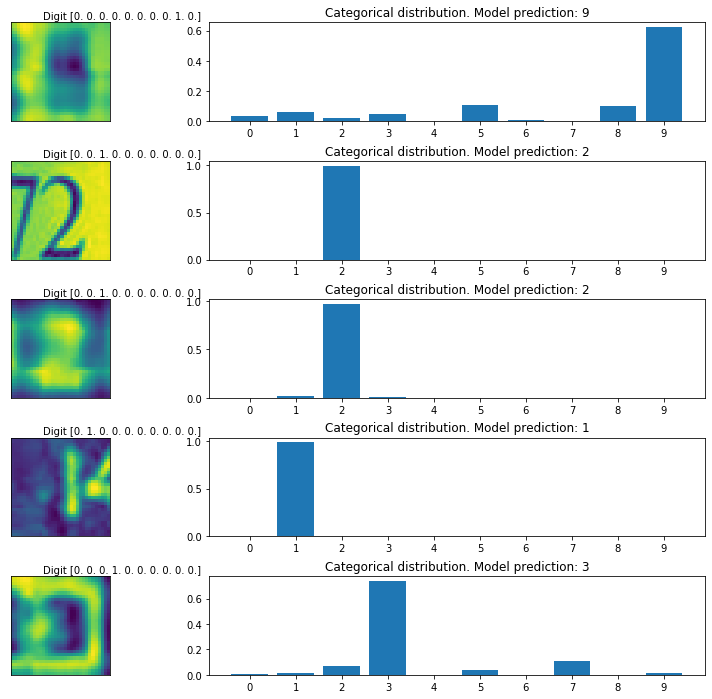

In [161]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_CNN.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()